In [3]:
from sklearn.datasets import *
import numpy as np
import mlutils
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

def visualize_tree(tree, feature_names):
    from sklearn.tree import export_graphviz
    with open("/tmp/dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f, impurity=False, class_names=["blue", "red"],
                        feature_names=feature_names, label="none")

    !dot -Tpng /tmp/dt.dot -o /tmp/dt.png
    
hasdot = !which dot
if len(hasdot)==0:
    print ("Installing Graphviz for tree visualization")
    !sudo apt-get update
    !sudo apt-get install -y graphviz

In [4]:
from sklearn.tree import DecisionTreeClassifier
X,y = make_moons(400, noise=0.1)
Xts,yts = make_moons(100, noise=0.1)

X,y = make_circles(400, noise=0.05)
Xts,yts = make_circles(100, noise=0.05)



In [5]:
X.shape, y.shape

((400, 2), (400,))

In [6]:
np.unique(y)

array([0, 1])

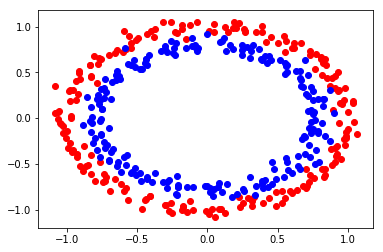

In [7]:
plt.scatter(X[y==0][:,0], X[y==0][:,1], color="red")
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="blue")


In [8]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X,y)
y_preds = dt.predict(X)
dt.score(X,y)

0.675

## Arboles de decision

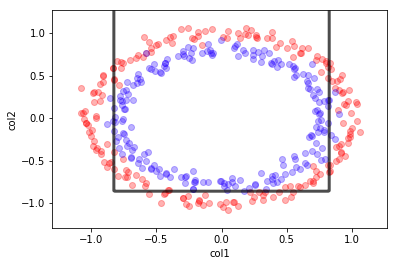

In [9]:
import mlutils
dt = DecisionTreeClassifier(max_depth=3); dt.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
plt.xlabel("col1"); plt.ylabel("col2");

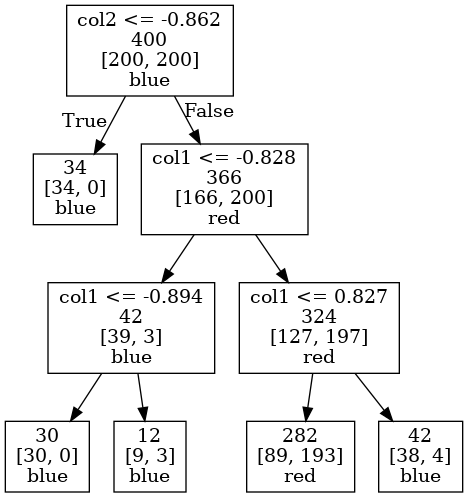

In [10]:
visualize_tree(dt, ["col1", "col2"])
Image("/tmp/dt.png", width=300)

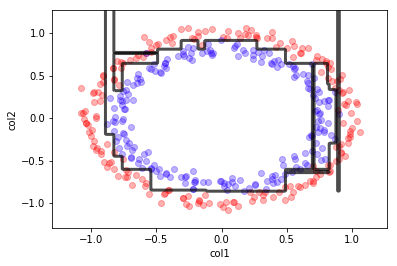

In [11]:
dt = DecisionTreeClassifier(max_depth=10); 
dt.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.xlabel("col1"); plt.ylabel("col2");

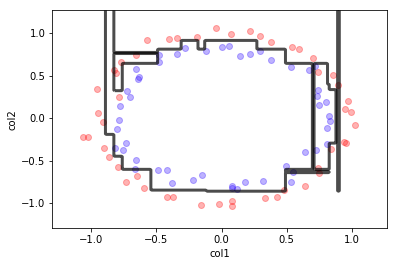

In [12]:
mlutils.plot_2Ddata(Xts, yts, dots_alpha=.3)
mlutils.plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.xlabel("col1"); plt.ylabel("col2");

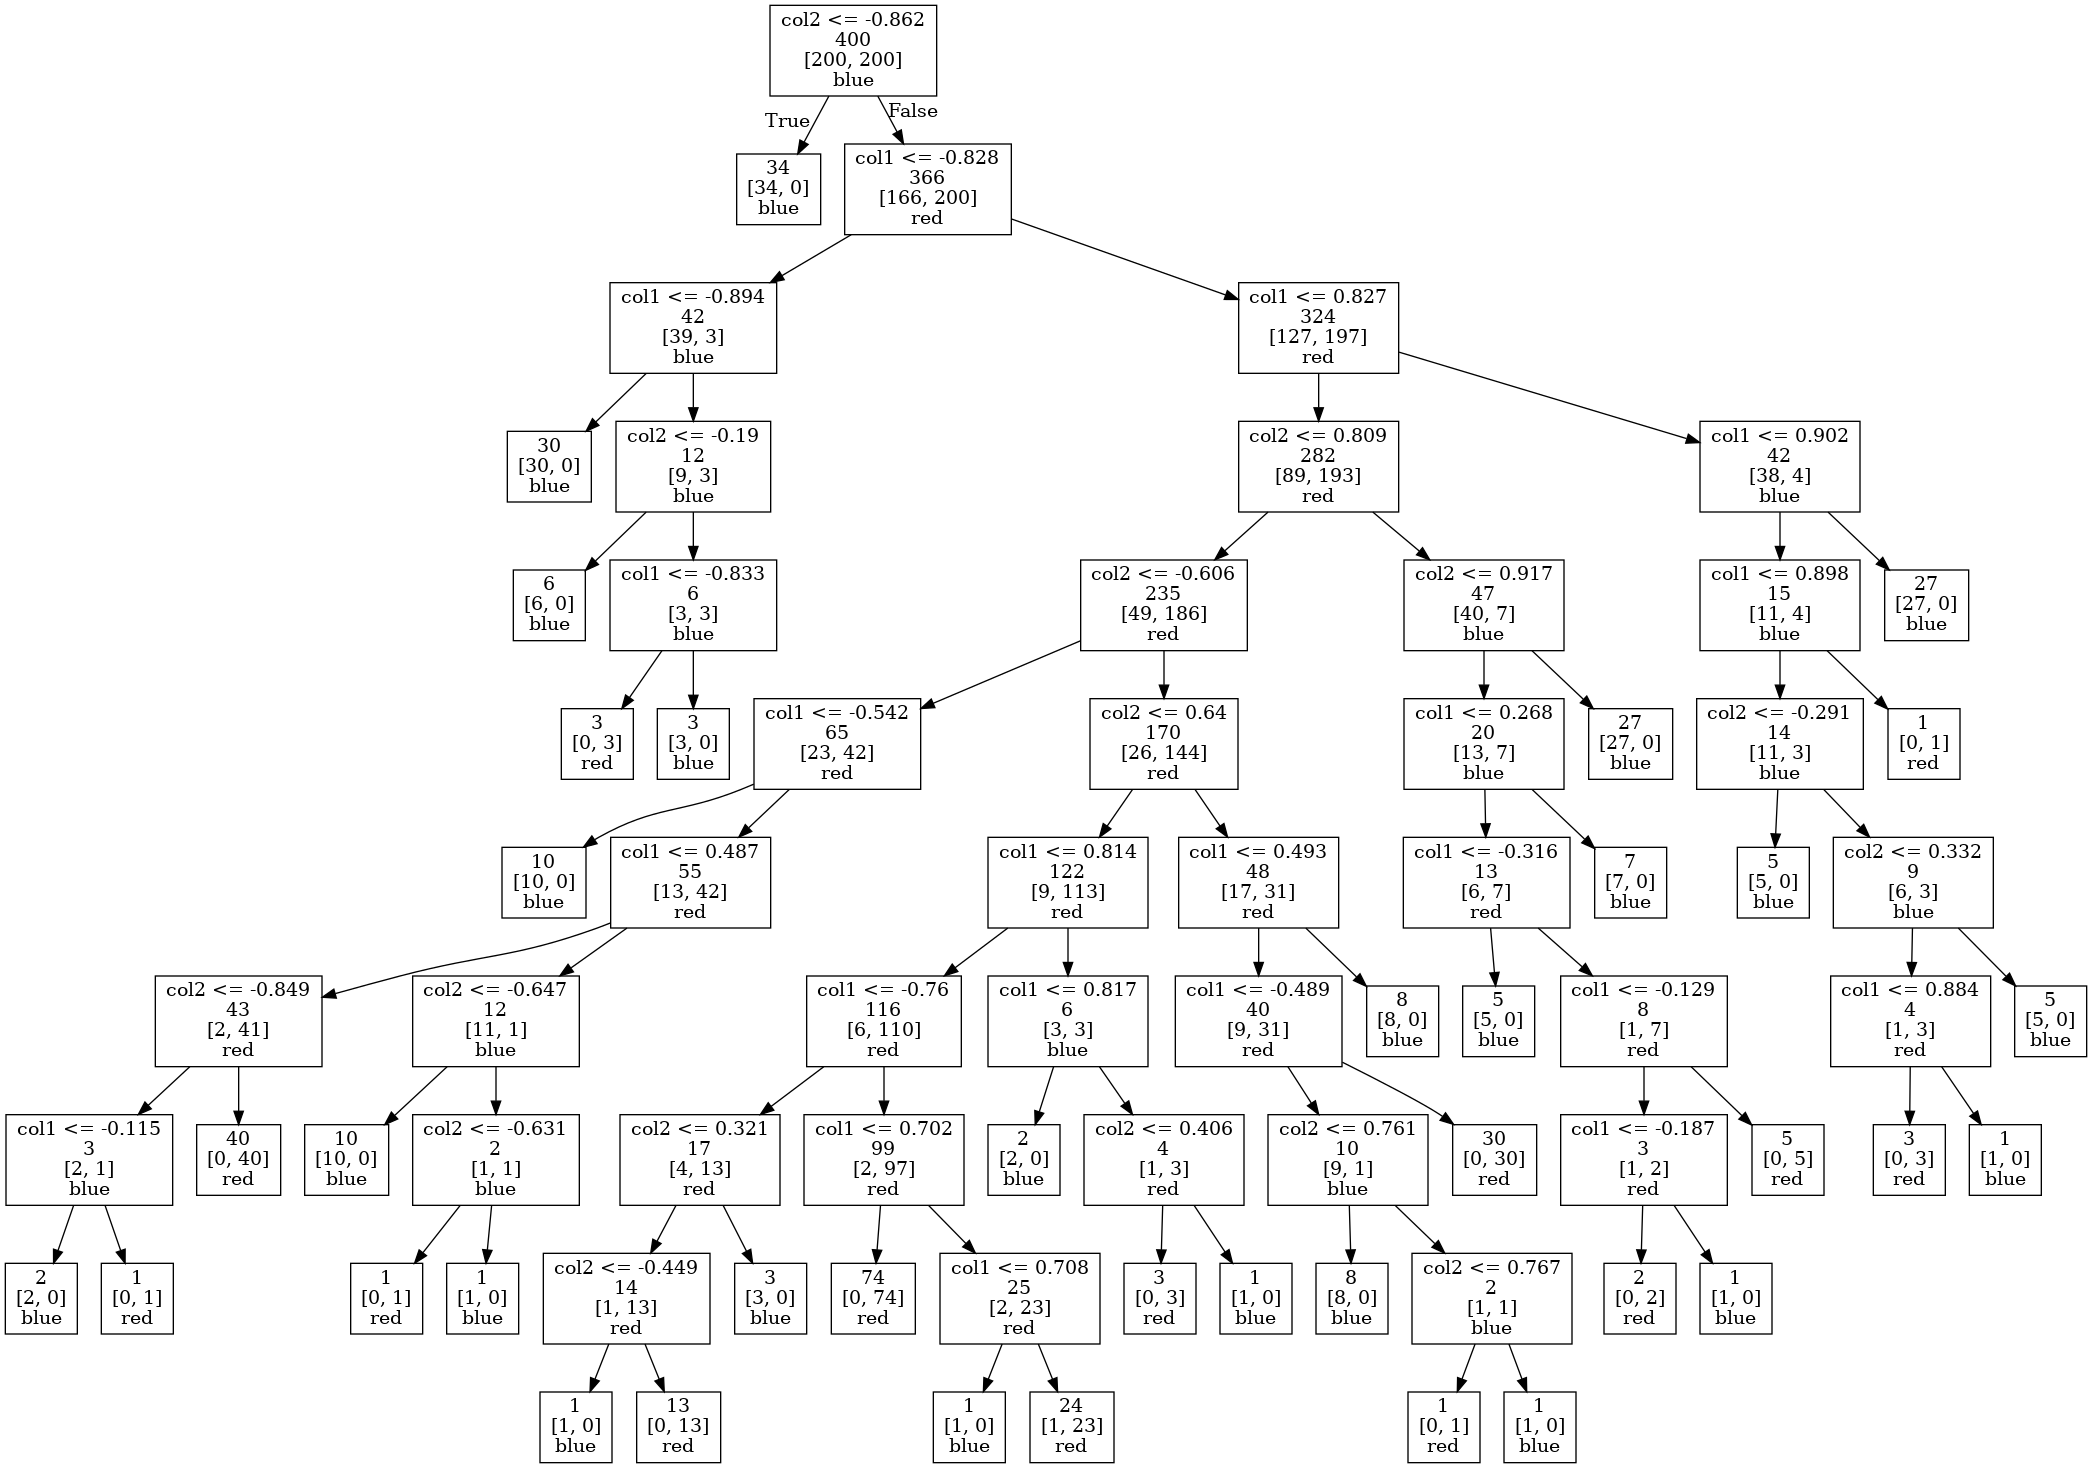

In [13]:
visualize_tree(dt, ["col1", "col2"])
Image("/tmp/dt.png", width=400)

## Naive Bayes

(0.62545, 0.37455)

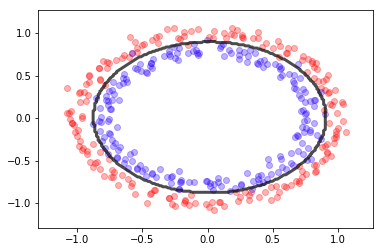

In [14]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


(0.677125, 0.322875)

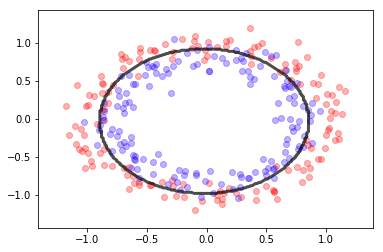

In [15]:
X,y = make_circles(300, noise=.1)
gb = GaussianNB()
gb.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


(0.539275, 0.460725)

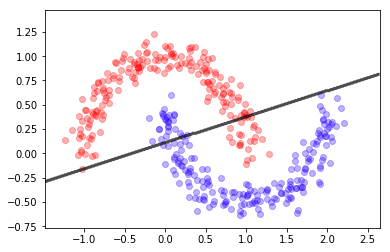

In [16]:
X,y = make_blobs(300, centers=2, cluster_std=2)
X, y = make_moons(400, noise=0.1)
gb = GaussianNB()
gb.fit(X,y)

mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


observa que si alguna de las variables no es independiente el método falla

/home/user/.conda/envs/p37/lib/python3.7/site-packages/scipy/stats/_multivariate.py:660: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


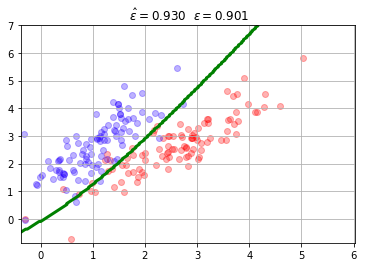

In [17]:
import mlutils
mc = mlutils.Example_Bayes2DClassifier(mean0=[2.5, 2.5], cov0=[[.9, .9], 
                                                               [0.8, 1.1]],
                                        mean1=[1, 2.5], cov1=[[0.5,.8],
                                                             [0.4,0.9]])
X,y = mc.sample(200)
mlutils.plot_2Ddata_with_boundary(mc.predict, X, y, line_width=3, line_color="green", dots_alpha=.3)
plt.title(" $\hat{\epsilon}=%.3f$"%mc.score(X,y)+"  $\epsilon=%.3f$"%mc.analytic_score());
plt.grid();


0.845


(0.661925, 0.338075)

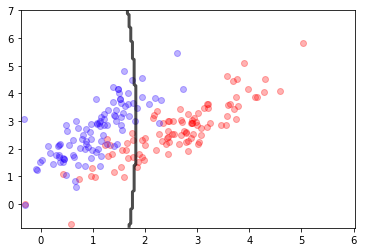

In [18]:
gb.fit(X,y)
print (gb.score(X,y))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


## Support vector machines

observa que $\gamma$ representa **cuanto de cercanos han de estar dos puntos para considerarlos similares**

1.0
number of support vectors 18


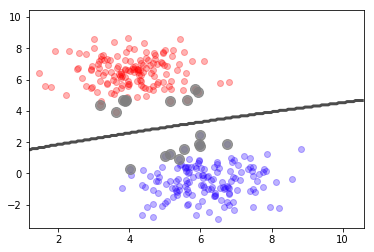

In [19]:
from sklearn.svm import SVC
X,y = make_blobs(300, centers=2, cluster_std=1)
sv = SVC(gamma=1e-2)
sv.fit(X,y)
print (sv.score(X,y))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.8, color="gray")
print ("number of support vectors", len(sv.support_vectors_))

0.845


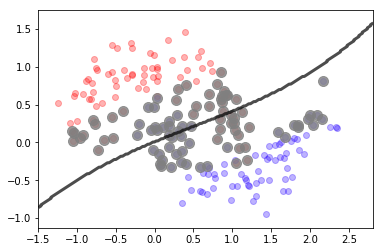

In [20]:
from sklearn.svm import SVC
X,y = make_moons(200, noise=0.2)
sv = SVC(gamma=.1)
sv.fit(X,y)
print (sv.score(X,y))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.8, color="gray")

In [21]:
sv.support_vectors_.shape

(88, 2)

0.975


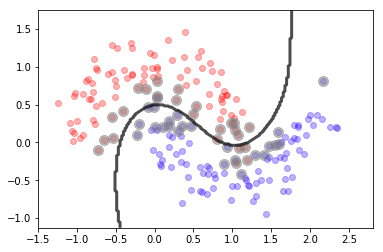

In [22]:
sv = SVC(gamma=1)
sv.fit(X,y)
print (sv.score(X,y))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.5, color="gray")

0.775


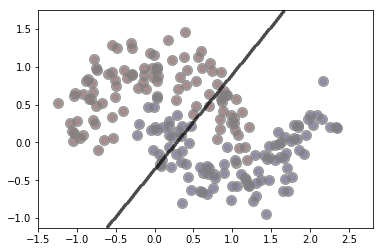

In [23]:
sv = SVC(gamma=1e-4)
sv.fit(X,y)
print (sv.score(X,y))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.7, color="gray")

## Random forests

0.775


(0.49315, 0.50685)

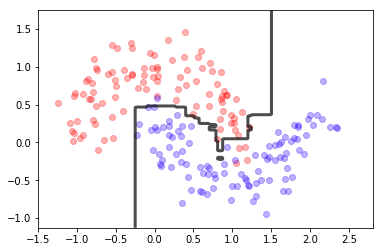

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=5)
rf.fit(X,y)
print (sv.score(X,y))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(rf.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


0.985


(0.486625, 0.513375)

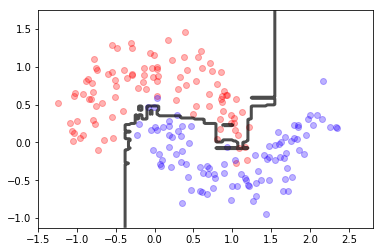

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, n_estimators=15)
rf.fit(X,y)
print (rf.score(X,y))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(rf.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
